<a href="https://colab.research.google.com/github/nimishvaradkar/Codebot/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a decision tree claasifier to predict wheather a customer a product or service based on their demoghraph and behavioral data. Used a dataset such as the Bank Marketing dataset from the UCL Machine Learning Repository.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bank.csv to bank (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_csv('bank.csv', sep=';')  # the file uses semicolon separator

# Basic info
df.head()
df.info()
df['y'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,count
y,
no,4000
yes,521


In [ ]:
# Drop duration to avoid data leakage
df = df.drop('duration', axis=1)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Check if everything is clean
print(df_encoded.isnull().sum())


age                    0
balance                0
day                    0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0
poutcome_success       0


In [ ]:
# Separate features and target
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8916728076639646

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.99      0.94      1205
        True       0.56      0.15      0.24       152

    accuracy                           0.89      1357
   macro avg       0.73      0.57      0.59      1357
weighted avg       0.86      0.89      0.86      1357


Confusion Matrix:
 [[1187   18]
 [ 129   23]]


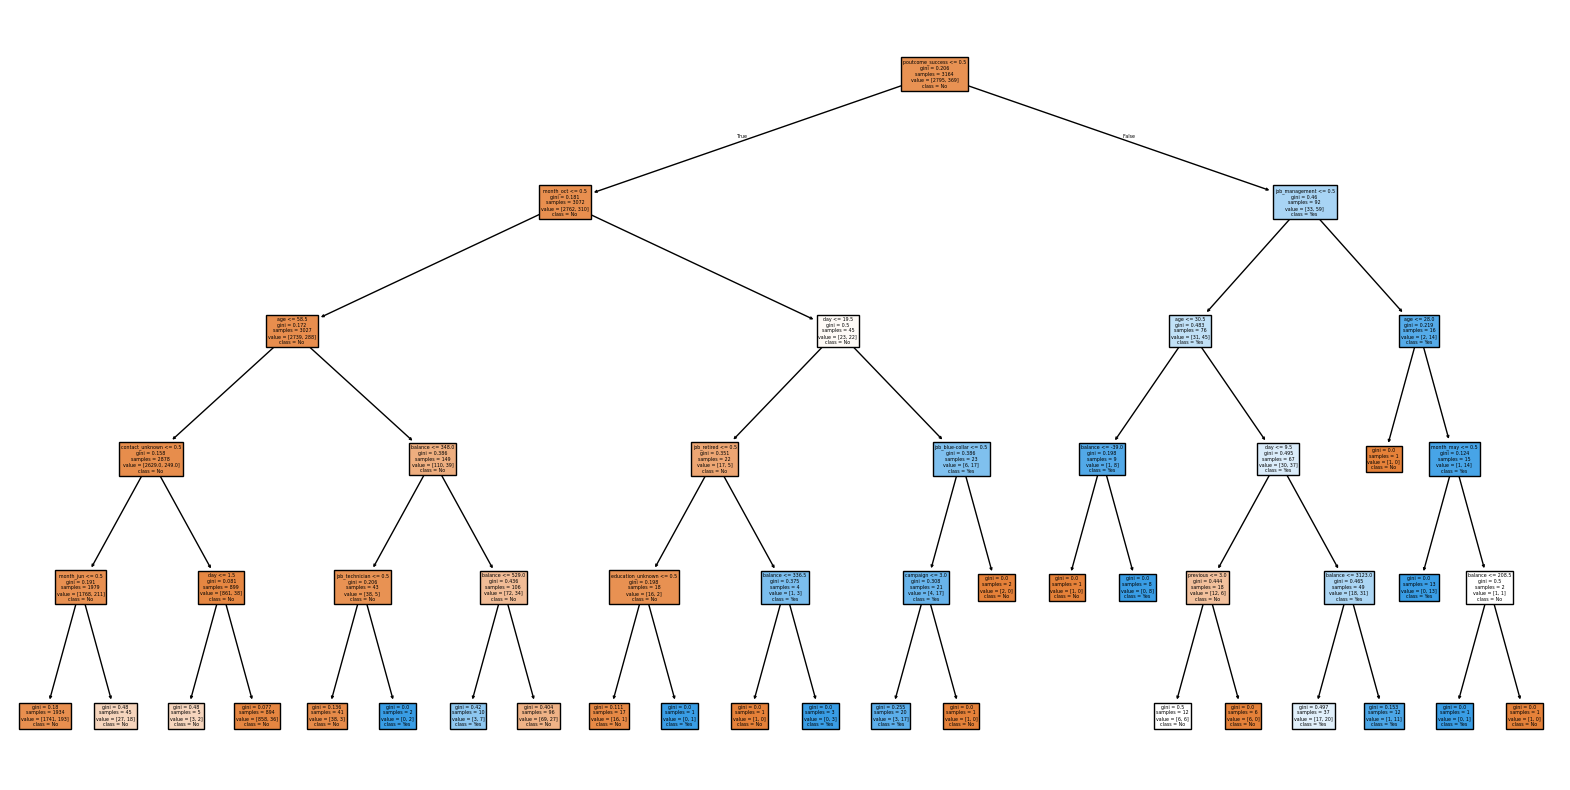

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()
